In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#SEN e COS
# A(t) = A0 * SEN(2pi*f0*t)

In [100]:
A0 = 2
f0 = 440 
sr = 44000 # tipo um CD
t_total = 1 # 1 segundo

t = np.linspace(0, t_total, sr)

In [101]:
t.shape

(44000,)

In [102]:
A_t = A0 * np.sin(2*np.pi*f0*t)

In [103]:
A_t

array([ 0.00000000e+00,  1.25583889e-01,  2.50672134e-01, ...,
       -2.50672134e-01, -1.25583889e-01,  1.25522677e-13])

In [104]:
A_t.shape

(44000,)

In [105]:
from IPython.display import Audio

In [106]:
Audio(A_t, rate=sr)

(0.0, 0.004545557853587581)

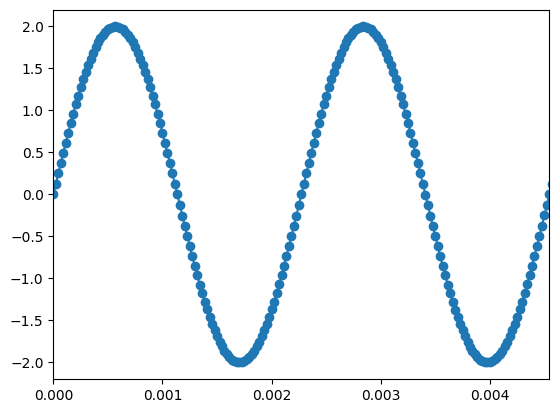

In [107]:
plt.plot(t, A_t, marker='o')
plt.xlim(0, t[200])

In [11]:
1/(0.003-0.0007)

434.7826086956522

In [86]:
def make_sound_wave(A0, f0, sr, t_total, kind='sin'):
    
    t = np.linspace(start=0, stop=t_total, num=int(sr*t_total))
    
    if kind == 'sin':
        A_t = A0 * np.sin(2*np.pi*f0*t)

    elif kind == 'cos':
        A_t = A0 * np.cos(2*np.pi*f0*t)
        
    else:
        print("Opção invalida")
        
    
    return t, A_t
        

In [108]:
t, som = make_sound_wave(2, 440, 44000, 1)

Audio(som, rate=sr)

In [109]:
t, som = make_sound_wave(2, 440, 44000, 1, 'cos')

Audio(som, rate=sr)

In [112]:
def make_song(lista_de_notas):
    nota_freqs = {
    'do': 264,
    're': 297,
    'mi': 330,
    'fa': 352,
    'sol': 396,
    'la': 440,
    'si': 495
    }
    song = np.array([])
    for nota in lista_de_notas:
        t, som = make_sound_wave(A0=2, f0=nota_freqs[nota], sr=44000, t_total = 0.5, kind='sin')
        song = np.append(song, som)
        
    return song


In [113]:
musica = make_song(['do', 're', 'mi', 'fa', 'sol', 'la', 'si'])
Audio(musica, rate=44000)

In [115]:
musica = make_song(['mi', 'mi', 'fa', 'sol', 'sol', 'fa','mi', 're', 'do', 'do', 're', 'mi', 'mi', 're', 're', 'mi', 'mi', 'fa', 'sol','sol', 'fa', 'mi', 're', 'do', 'do', 're', 'mi', 're', 'do', 'do'])

In [116]:
Audio(musica, rate=44000)

In [138]:
def plot_sound_wave(t, wav, freq=None, n_samples_to_plot=200, title=None, figsize=(16,5)):
    fig, ax = plt.subplots(figsize=figsize)
    
    plt.title(title)
    
    #caso mais de um audio
    if isinstance(wav, list):
        if isinstance (freq, list):
            for w, f in zip(wav, freq):
                plt.plot(t, w, label = f"Sinal de f={f}Hz")
        else:
            for i, w in enumerate(wav):
                plt.plot(t, w, label = f"Sinal de audio {i + 1}")
    else:
        if freq:
            plt.plot(t, w, label=f"Sinal de f={freq}Hz")
        else:
            plt.plot(t, wav, label=f"Sinal de Audio")
    
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")
    
    
    plt.xlim(0, t[n_samples_to_plot])
    A_max = np.abs(wav).max()
    plt.ylim(-A_max*1.1, A_max*1.1)
    
    ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [128]:
t, wave_1 = make_sound_wave(A0=1, f0=440, t_total=2, sr=44000, kind='sin')
t, wave_2 = make_sound_wave(A0=1, f0=430, t_total=2, sr=44000, kind='sin')

wave_12 = wave_1 + wave_2

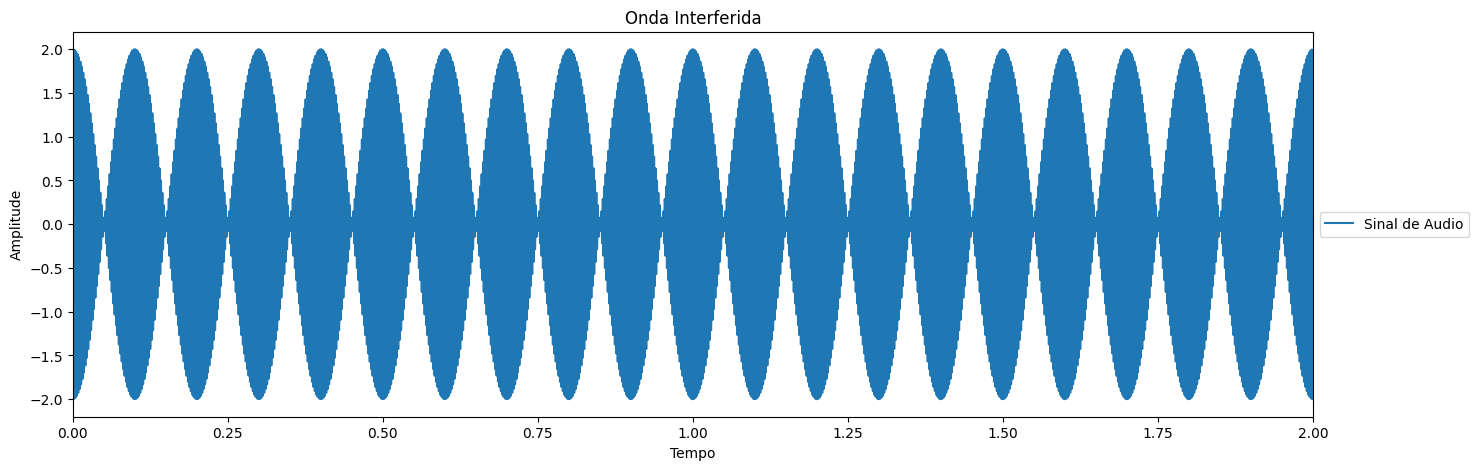

In [119]:
plot_sound_wave(t, wave_12, freq=None, n_samples_to_plot=sr*2 - 1, title = 'Onda Interferida')

Audio(wave_12, rate=44000)

(0.0, 0.004545506198934079)

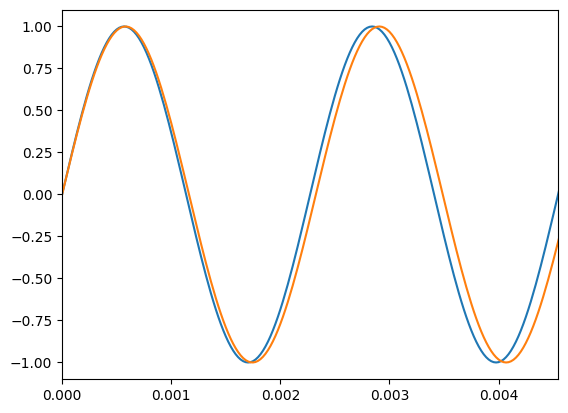

In [129]:
plt.plot(t, wave_1)
plt.plot(t, wave_2)
plt.xlim(0, t[200])

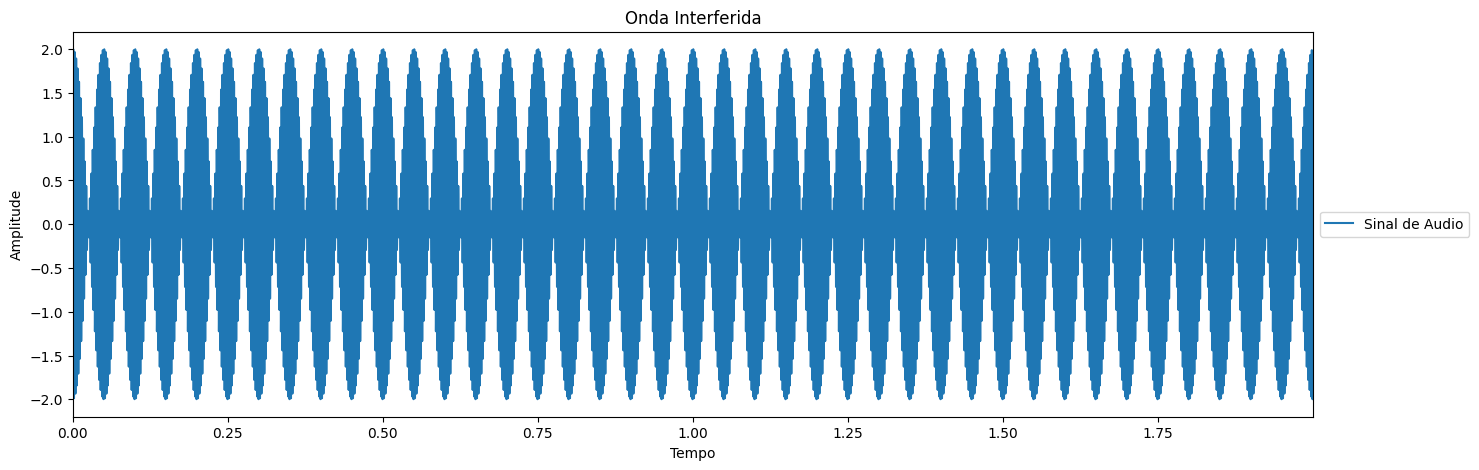

In [135]:
t, wave_1 = make_sound_wave(A0=1, f0=440, t_total=4, sr=44000, kind='sin')
t, wave_2 = make_sound_wave(A0=1, f0=420, t_total=4, sr=44000, kind='sin')

wave_12 = wave_1 + wave_2

plot_sound_wave(t, wave_12, freq=None, n_samples_to_plot=sr*2 - 1, title = 'Onda Interferida')

Audio(wave_12, rate=44000)

(0.0, 0.004545506198934079)

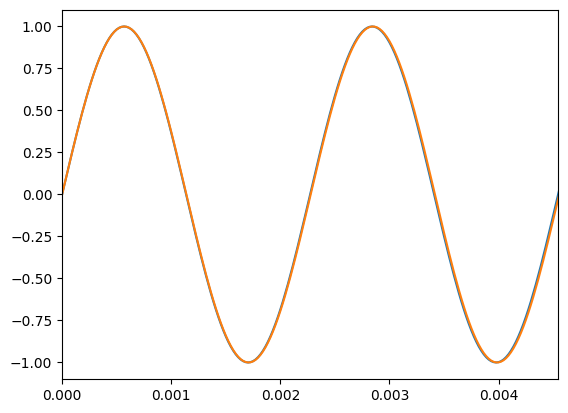

In [131]:
plt.plot(t, wave_1)
plt.plot(t, wave_2)
plt.xlim(0, t[200])

In [136]:
# TRANSFORMADA DE FOURIER

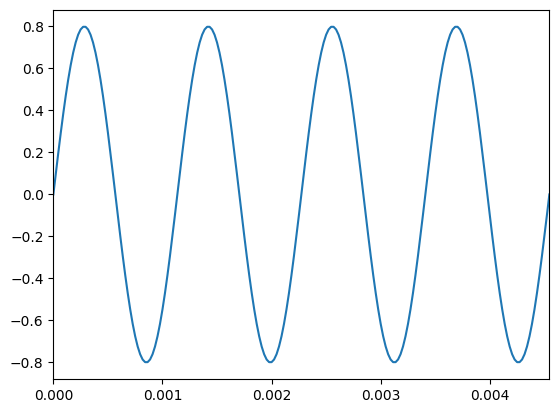

In [141]:
t_sin, wave_sin = make_sound_wave(A0 = 0.8, f0=880, t_total=2, sr=44000, kind='sin')

plt.plot(t_sin, wave_sin)
plt.xlim(0, t[200])

Audio(wave_sin, rate=sr)

In [142]:
wave_sin_fft = np.fft.fft(wave_sin)

In [146]:
wave_sin.shape

(88000,)

In [144]:
wave_sin_fft.shape

(88000,)

In [147]:
wave_sin_fft

array([1.09421361e-11+0.j        , 1.62140629e-08-0.00045394j,
       6.48228853e-08-0.00090789j, ..., 1.45853265e-07+0.00136183j,
       6.48228849e-08+0.00090789j, 1.62140619e-08+0.00045394j])

In [148]:
abs(wave_sin_fft)

array([1.09421361e-11, 4.53942112e-04, 9.07885111e-04, ...,
       1.36182987e-03, 9.07885111e-04, 4.53942112e-04])